In [1]:
import numpy as np
import h5py
import json
import sys
sys.path.append('F:/Linux')
sys.path.append("C:/Users/qq651/OneDrive/Codes/A2project/")
import illustris_python as il
import matplotlib.pyplot as plt
from plotTools.plot import *

il1_A2list = np.load('f:/Linux/localRUN/il1_A2dict(135-68_21part).npy', allow_pickle=1).item()
tng_A2list = np.load('f:/Linux/localRUN/tng_A2dict(99-33_21part).npy', allow_pickle=1).item()
tng_zformation = np.load('f:/Linux/localRUN/tng_zformation.npy', allow_pickle=1).item()
il1_zformation = np.load('f:/Linux/localRUN/il1_zformation.npy', allow_pickle=1).item()

il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')

tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy')

In [2]:
tng_unbar = []
for i in tng_diskID:
    if i not in tng_barID:
        tng_unbar.append(i)
        
il1_unbar = []
for i in il1_diskID:
    if i not in il1_barID:
        il1_unbar.append(i)

In [3]:
il1_snap = np.array([135, 127, 120, 113, 108, 103, 99, 95, 92, 89, 85, 82, 80, 78, 76, 75, 73, 71, 70, 69, 68])
tng_snap = np.array([99, 91, 84, 78, 72, 67, 63, 59, 56, 53, 50, 47, 45, 43, 41, 40, 38, 36, 35, 34, 33])
Redshift = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

In [4]:
il1_zbar = []
for haloID in il1_barID:
    il1_zbar.append(zbar(haloID, il1_A2list))

tng_zbar = []
for haloID in tng_barID:
    tng_zbar.append(zbar(haloID, tng_A2list))

tng_zbar = np.array(tng_zbar)
il1_zbar = np.array(il1_zbar)

In [6]:
def culmu(nums):
    nums = np.array(nums)
    sum = np.sum(nums)
    for i in range(1, len(nums)):
        nums[i] += nums[i-1]
    return nums / sum

# def culmu(nums, sum):
#     nums = np.array(nums)
#     for i in range(1, len(nums)):
#         nums[i] += nums[i-1]
#     return nums / sum

In [8]:
    il1_y = []
    tng_y = []
    for i in Redshift:
        tng_y.append(len(tng_zbar[tng_zbar == i]))
        il1_y.append(len(il1_zbar[il1_zbar == i]))

In [9]:
culmu(il1_y)

array([0.23636364, 0.42727273, 0.53636364, 0.65454545, 0.67272727,
       0.74545455, 0.8       , 0.82727273, 0.85454545, 0.89090909,
       0.91818182, 0.93636364, 0.94545455, 0.95454545, 0.95454545,
       0.98181818, 0.98181818, 0.98181818, 0.98181818, 0.98181818,
       1.        ])

In [12]:
def zbarHist():
    il1_y = []
    tng_y = []
    for i in Redshift:
        tng_y.append(len(tng_zbar[tng_zbar == i]))
        il1_y.append(len(il1_zbar[il1_zbar == i]))
    bins = Redshift

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.bar(bins, il1_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='b', label='Illustris-1 barred galaxies')
    ax.bar(bins+0.035, tng_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='r', label='TNG-100 barred galaxies')
    # ax.xticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.0])

    #culmulative sum
    ax2 = ax.twinx()
    ax2.set_ylim(0, 1.2)
    ax2.set_ylabel('Fraction', fontsize = 29)
    ax2.plot(bins+0.035, culmu(il1_y), color='orange', marker='o', label='Illustris-1 fraction')
    ax2.plot(bins+0.035, culmu(tng_y), color='c', marker='o', label='TNG-100 fraction')

    ax.set_xlabel(r'Bar formation redshift $z_{bar}$', fontsize = 29)
    ax.set_ylabel('N', fontsize = 29)
    ax.set_xlim(-0.05,2.15)
    ax.set_ylim(0,121)
    ax.tick_params(labelsize=22)
    ax2.tick_params(labelsize=22)
    ax.legend(fontsize = 18)
#     fig.savefig('F:/Linux/local_result/zbar/zbarHist.pdf')

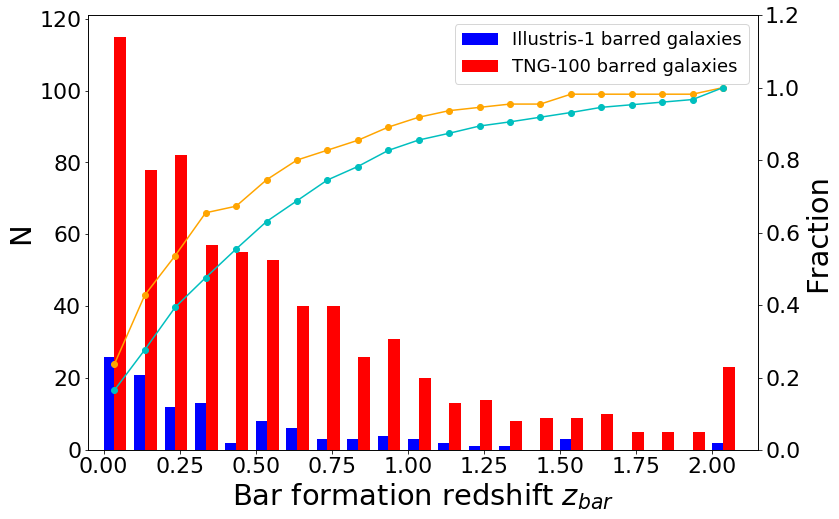

In [13]:
zbarHist()

In [111]:
def zbarHist_v2():
    bins = Redshift

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    il1_y = ax.hist(il1_zbar, bins, color='b', align = 'mid', label='        Illustris-1', edgecolor='b', histtype='step', alpha = 0.7)
    tng_y = ax.hist(tng_zbar, bins, color='r', align = 'mid', label='        TNG-100', edgecolor='r', histtype='step', alpha = 0.7)
    # ax.xticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.0])

    #culmulative sum
    ax2 = ax.twinx()
    ax2.set_ylim(0, 1.2)
    ax2.set_ylabel('Cummulative distribution fraction', fontsize = 22)
    ax2.plot(bins[:-1]+0.045, culmu(il1_y[0]), color='orange', marker='o', label=' ')
    ax2.plot(bins[:-1]+0.045, culmu(tng_y[0]), color='c', marker='o', label=' ')

    ax.set_xlabel(r'Bar formation redshift $z_{bar}$', fontsize = 22)
    ax.set_ylabel(r'Fraction of barred / disk', fontsize = 29)
    ax.set_xlim(-0.01,2.15)
#     ax.set_ylim(0, 0.3)
    ax.tick_params(labelsize=20)
    ax2.tick_params(labelsize=20)
    ax.legend(fontsize = 18)
    ax2.legend(loc = 2, bbox_to_anchor = (0.75, 1), frameon=False, fontsize = 18)
    
#     plt.savefig('f:/Linux/result_v2/zbarHist.pdf')

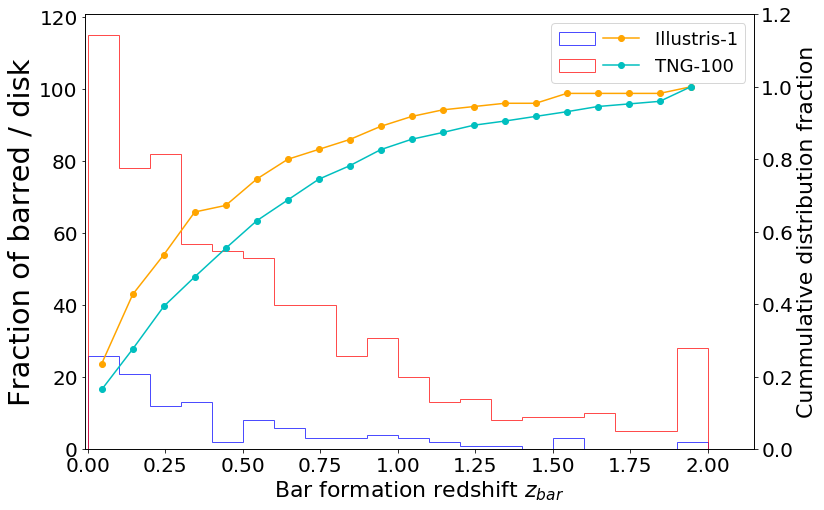

In [112]:
zbarHist_v2()

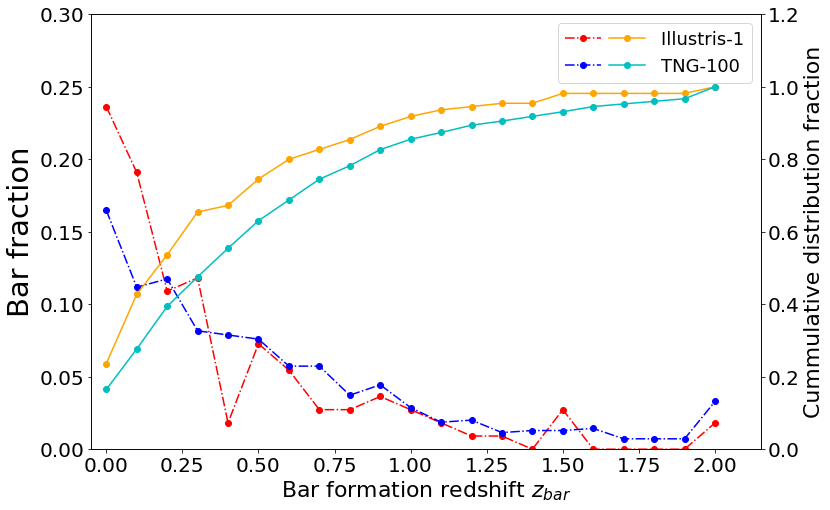

In [185]:
# zbarHist_frac_v2():

bins = np.append(Redshift, 2.1)
# bins = np.array(Redshift)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

il1_y = np.histogram(il1_zbar, bins)
tng_y = np.histogram(tng_zbar, bins)

ax.plot(bins[:-1], il1_y[0] / np.sum(il1_y[0]), color='r', marker='o', label='        Illustris-1', ls='-.')
ax.plot(bins[:-1], tng_y[0] / np.sum(tng_y[0]), color='b', marker='o', label='        TNG-100', ls='-.')

#culmulative sum
ax2 = ax.twinx()
ax2.set_ylim(0, 1.2)
ax2.set_ylabel('Cummulative distribution fraction', fontsize = 22)
ax2.plot(bins[:-1], culmu(il1_y[0]), color='orange', marker='o', label=' ')
ax2.plot(bins[:-1], culmu(tng_y[0]), color='c', marker='o', label=' ')

ax.set_xlabel(r'Bar formation redshift $z_{bar}$', fontsize = 22)
ax.set_ylabel(r'Bar fraction', fontsize = 29)
ax.set_xlim(-0.05,2.15)
ax.set_ylim(0, 0.3)
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.legend(fontsize = 18)
ax2.legend(loc = 2, bbox_to_anchor = (0.75, 1), frameon=False, fontsize = 18)
    
plt.savefig('f:/Linux/result_v2/zbarHist_frac.pdf')

In [183]:
bins[:-1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

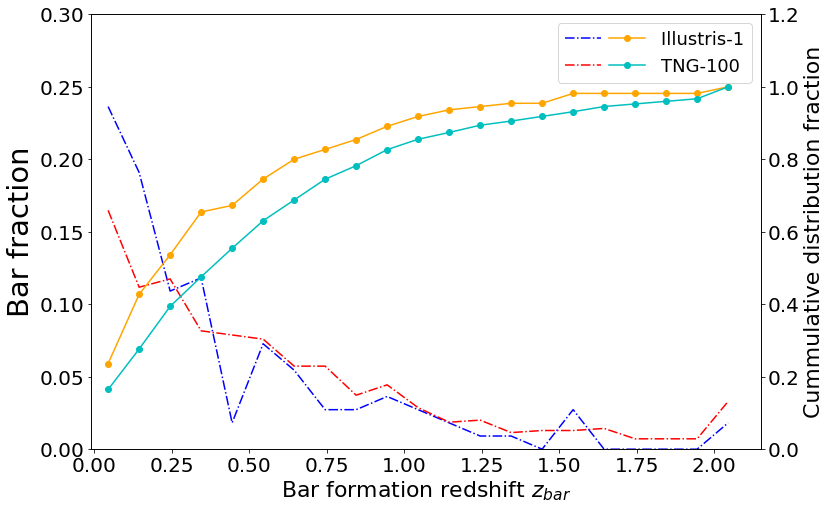

In [171]:
zbarHist_frac_v2()

In [25]:
def Total_zformation():
    il1_y = []
    tng_y = []

    il1_zfor = []
    tng_zfor = []
    for i in tng_zformation.keys():
        tng_zfor.append(tng_zformation[i])
    for i in il1_zformation.keys():
        il1_zfor.append(il1_zformation[i])
    tng_zfor = np.array(tng_zfor)
    il1_zfor = np.array(il1_zfor)
    #Galaxy formation time might lesser than 2.0 , add it to the last bin
    for i in Redshift:
        tng_y.append(len(tng_zfor[tng_zfor == i]))
        il1_y.append(len(il1_zfor[il1_zfor == i]))
    tng_y[-1] += len(tng_zfor[tng_zfor > 2.0])
    il1_y[-1] += len(il1_zfor[il1_zfor > 2.0])

    bins = Redshift
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
#     h1 = ax.bar(bins, il1_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='b', label='Illustris-1 disk galaxies')
#     h2 = ax.bar(bins+0.035, tng_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='r', label='TNG-100 disk galaxies')
    ax.plog(bins, il1_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='b', label='Illustris-1 disk galaxies')
    ax.plot(bins+0.035, tng_y, width=(bins[1] - bins[0]) * 0.4, align = 'edge', color='r', label='TNG-100 disk galaxies')
    
    # ax.xticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.0])
    ax.set_xlabel(r'Galaxy formation redshift $z_{formation}$', fontsize = 'large')
    ax.set_ylabel('N', fontsize = 'large')
    ax.set_xlim(-0.05,2.15)
    ax.set_ylim(0,180)

    ax.legend(loc=1, fontsize = 'xx-large')
#     fig.savefig('F:/Linux/local_result/zbar/Total_zformation.pdf')

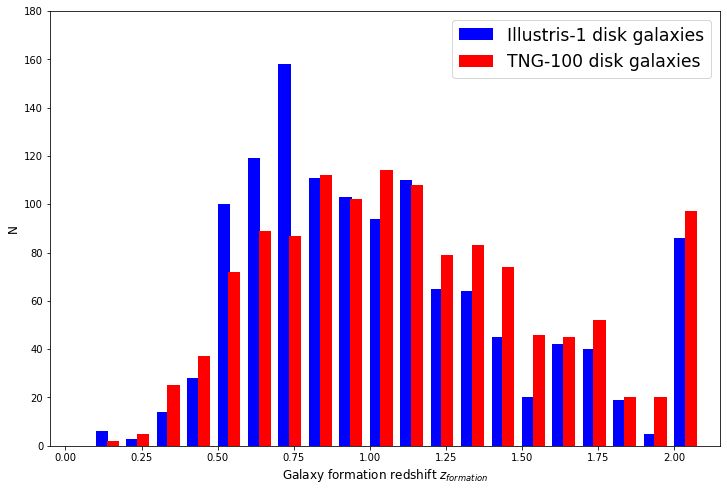

In [23]:
Total_zformation()

In [8]:
def separate_zformation():
    il1_bar_y = []
    il1_y = []
    tng_bar_y = []
    tng_y = []

    il1_bar = []
    il1_ub = []
    tng_bar = []
    tng_ub = []
    for i in tng_diskID:
        if i in tng_barID:
            tng_bar.append(tng_zformation[i])
        tng_ub.append(tng_zformation[i])
    for i in il1_diskID:
        if i in il1_barID:
            il1_bar.append(il1_zformation[i])
        il1_ub.append(il1_zformation[i])
    tng_bar = np.array(tng_bar)
    tng_ub = np.array(tng_ub)
    il1_bar = np.array(il1_bar)
    il1_ub = np.array(il1_ub)

    #Galaxy formation time might lesser than 2.0 , add it to the last bin
    for i in Redshift:
        tng_bar_y.append(len(tng_bar[tng_bar == i]))
        il1_bar_y.append(len(il1_bar[il1_bar == i]))
        tng_y.append(len(tng_ub[tng_ub == i]))
        il1_y.append(len(il1_ub[il1_ub == i]))
    tng_bar_y[-1] += len(tng_bar[tng_bar > 2.0])
    il1_bar_y[-1] += len(il1_bar[il1_bar > 2.0])
    tng_y[-1] += len(tng_ub[tng_ub > 2.0])
    il1_y[-1] += len(il1_ub[il1_ub > 2.0])

    bins = Redshift
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(bins, il1_y, color='c', marker='o', label='Illustris-1 unbarred')
    ax.plot(bins, il1_bar_y, color='b', marker='o', label='Illustris-1 barred')
    ax.plot(bins, tng_y, color='orange', marker='^', label='TNG-100 unbarred')
    ax.plot(bins, tng_bar_y, color='r', marker='^', label='TNG-100 barred')
    # ax.xticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.0])
    ax.set_xlabel(r'Galaxy formation redshift $z_{formation}$', fontsize = 29)
    ax.set_ylabel('N', fontsize = 29)
    ax.set_xlim(-0.05,2.15)
    # ax.set_ylim(0,121)
    ax.tick_params(labelsize=22)
    ax.legend(fontsize = 18)
    fig.savefig('F:/Linux/local_result/zbar/separate_zformation.pdf')

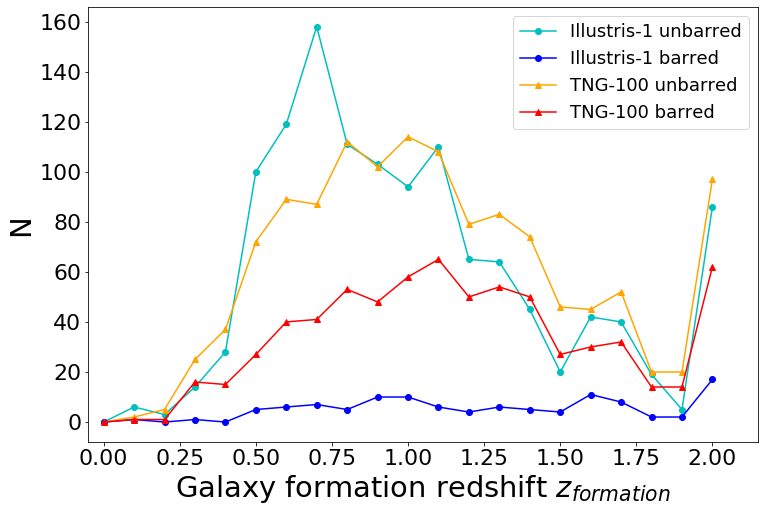

In [9]:
separate_zformation()

In [62]:
#Generate gas fraction data
tng_gf = {}
il1_gf = {}
for snap in tng_snap:
    mas = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    tng_gf[snap] = Gf

for snap in il1_snap:
    mas = il.func.loadSubhalos('il1', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    il1_gf[snap] = Gf



d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [60]:
def zbarScatter():
    # fig = plt.figure(figsize=())
    
    tng_ydata_zbar = []
    tng_xdata_gf = []
    for haloID in tng_barID:
        zform = tng_zformation[haloID]
        if zform > 2.0:
            zform = 2.0
        snap = tng_snap[Redshift == zform][0]
        prog = LoadMergHist('TNG', haloID)[0]
        try:
            subID = prog[snap]
        except:
            print(haloID)
            continue    
        gf = tng_gf[snap][subID]
        tng_xdata_gf.append(gf)
        tng_ydata_zbar.append(zbar(haloID, tng_A2list))

    #ydata_zbar = il1_zbar
    il1_xdata_gf = []
    for haloID in il1_barID:
        zform = il1_zformation[haloID]
        if zform > 2.0:
            zform = 2.0
        snap = il1_snap[Redshift == zform][0]
        prog = LoadMergHist('il1', haloID)[0]
        subID = prog[snap]
        gf = il1_gf[snap][subID]
        il1_xdata_gf.append(gf)

    plt.scatter(tng_xdata_gf, tng_ydata_zbar, s=4, label='TNG-100')
    plt.scatter(il1_xdata_gf, il1_zbar, s=6, color='r', label='Illustris-1')

    plt.xlabel(r'Gas fraction at galaxy $z_{formation}$')
    plt.ylabel(r'$z_{bar}$')
    plt.xlim(-0.02, 1)
    plt.legend()
    plt.savefig('F:/Linux/local_result/zbar_zformGF.pdf')

In [61]:
zbarScatter()

NameError: name 'tng_gf' is not defined

In [50]:
tng_xdata_gf = []
for haloID in tng_barID:
    zform = tng_zformation[haloID]
    if zform > 2.0:
        zform = 2.0
        
    snap = tng_snap[Redshift == zform][0]
    prog = LoadMergHist('TNG', haloID)[0]
    try:
        subID = prog[snap]
    except:
        print(haloID)
        continue    
    gf = tng_gf[snap][subID]
    tng_xdata_gf.append(gf)

17194


In [48]:
tng_snap[Redshift == zform][0]

33

In [40]:
tng_xdata_gf

[0.06479559,
 0.08240806,
 0.22298764,
 0.3239451,
 0.38321367,
 0.0019173068,
 0.0018603634,
 0.24680059,
 0.29183352,
 0.08986763,
 0.4014139,
 0.073754095,
 0.1423769,
 0.00015325188,
 0.10782414,
 0.14561807,
 0.30632505,
 0.120145,
 0.41439608,
 0.16167761,
 0.29409394,
 0.14595877,
 0.26344398,
 0.15624718,
 0.28650376,
 0.144462,
 0.1051806,
 0.2743558,
 0.25800192,
 0.20968057,
 0.0022572882,
 0.17987983,
 0.12594092,
 0.14398071,
 0.23317412,
 0.11879599]